Build a regression model.

In [50]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


citybikes_df = pd.read_csv('citybikes_joined.csv')

In [51]:
#choosing features that migth have some effect on the model
citybikes_model_df = citybikes_df[['empty_slots',
                                   'free_bikes',
                                   'ebikes',
                                   'noOf_normal_bikes',
                                   'total_slots',
                                   'rating_avg_bar',
                                   'count_bar',
                                   'rating_avg_rest',
                                   'count_rest']]
#citybikes_model_df

#found some null values and replaced them with 0
citybikes_model_df = citybikes_model_df.fillna({column: 0 for column in citybikes_model_df.columns})
citybikes_model_df


,empty_slots,free_bikes,ebikes,noOf_normal_bikes,total_slots,rating_avg_bar,count_bar,rating_avg_rest,count_rest
0,15,21,4,17,36,3.811111,9.0,3.909091,11.0
1,10,6,1,5,16,3.983333,12.0,4.112500,8.0
2,1,25,7,18,26,4.157143,14.0,4.233333,6.0
3,4,12,0,12,16,4.011111,9.0,3.718182,11.0
4,7,9,2,7,16,3.442857,7.0,3.853846,13.0
...,...,...,...,...,...,...,...,...,...
246,15,5,3,2,20,4.240000,10.0,4.030000,10.0
247,6,14,3,11,20,4.042857,14.0,4.133333,6.0
248,17,3,2,1,20,3.400000,4.0,2.500000,1.0
249,23,3,1,2,26,3.400000,4.0,2.500000,1.0


c:\Users\apoor\anaconda3\envs\test_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

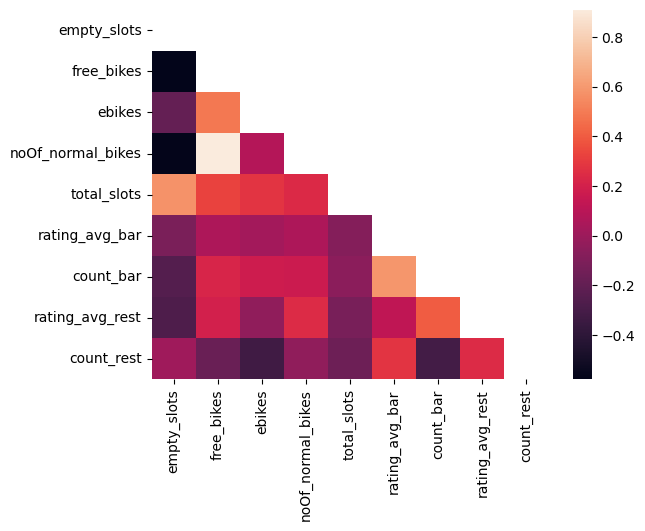

In [52]:
sns.heatmap(citybikes_model_df.corr(),
            annot=True, 
            mask=np.triu(np.ones_like(citybikes_model_df.corr(),dtype=bool)))

- This heatmap shows the relation between all the features in the dataset. 
- There doesn't seem to be a strong co-relation between the features.
- Going to drop free bikes and no.of normal bikes to see if the co-relations change

In [53]:
# a simple liner regression model for average restaurant rating and total bike slots
x = citybikes_model_df['total_slots']
y = citybikes_model_df['rating_avg_bar']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         rating_avg_bar   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.587
Date:                Mon, 11 Mar 2024   Prob (F-statistic):              0.209
Time:                        10:14:56   Log-Likelihood:                -275.14
No. Observations:                 251   AIC:                             554.3
Df Residuals:                     249   BIC:                             561.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0459      0.172     23.576      

- The R-squared value is 0.009, which means that the average bar rating is only 0.09% dependent on the total bike slots of the station.
- The P value is 0.141 which is much higher than 0.05 we fail to rehject the null hypothesis here.
- The feature total_slots does not add much value to this dataset.

In [54]:
x = citybikes_model_df['total_slots']
y = citybikes_model_df['rating_avg_rest']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        rating_avg_rest   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     3.780
Date:                Mon, 11 Mar 2024   Prob (F-statistic):             0.0530
Time:                        10:15:03   Log-Likelihood:                -98.528
No. Observations:                 251   AIC:                             201.1
Df Residuals:                     249   BIC:                             208.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.0974      0.085     48.255      

- Here the R-squared id 0.015, 1.5%, which is albiet slightly higher than the previous variable.
- The P value here is 0.054 which is so close to 0.05, that we cannot fully reject the null hypothesis.
- This makes the model maybe slightly significant.

c:\Users\apoor\anaconda3\envs\test_env\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

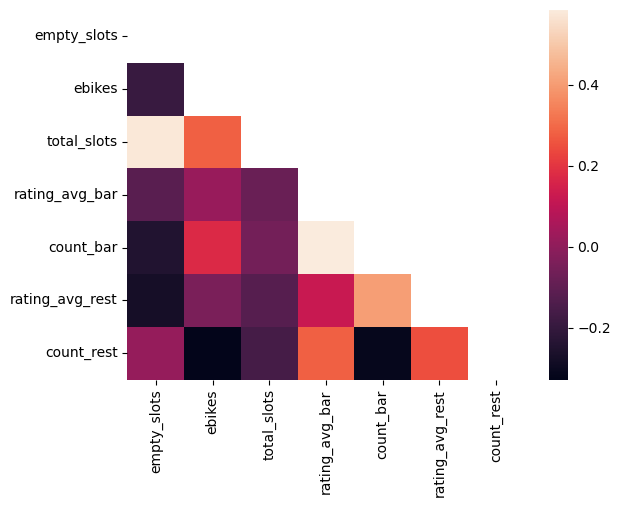

In [55]:
new_citybikes_df = citybikes_model_df.drop(['free_bikes', 'noOf_normal_bikes'], axis=1)

sns.heatmap(new_citybikes_df.corr(),
            annot=True, 
            mask=np.triu(np.ones_like(new_citybikes_df.corr(),dtype=bool)))

In [56]:
x = new_citybikes_df['ebikes']
y = new_citybikes_df['count_bar']
x = sm.add_constant(x)
model = sm.OLS(y,x)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              count_bar   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     7.676
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00602
Time:                        10:15:12   Log-Likelihood:                -686.26
No. Observations:                 251   AIC:                             1377.
Df Residuals:                     249   BIC:                             1384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6578      0.305     31.702      0.0

- The R-squared here is 0.030 which shows there's a 3% variance on the dependent variable
- The P value is 0.006 which suggests a significant relationship between the two variables.
- So we ca say that there may be significant relation between bike stations that have ebikes and bar around the station,
    but the low R-square suggests maybe there isn't enough data to strongly back this hypothesis.

# Stretch

How can you turn the regression model into a classification model?

- The column which gives a true or false value for bikes available in at a station.
    Making a new dataset with that and also turning the catergories to a Yes or No,
    a model can made to ask to question, Are there more bikes available near
    resturants or bar, which will give us an aswer of which is more visitied.
